1. WAP to determine EOQ using the basic 4 models

In [60]:
from math import sqrt

In [61]:
from abc import ABC, abstractmethod
class DetModels(ABC):
    @abstractmethod
    def get_quantity():
        pass
    @abstractmethod
    def get_total_cost():
        pass
    def get_cycle_time(self, Q, lam):
        return Q/lam

class EOQ(DetModels):
    def get_quantity(self, A, lam, I, C):
        return int(sqrt((2*A*lam)/(I*C)))
    def get_total_cost(self, A, lam, I, C, Q):
        holding_cost = (I * C * (Q / 2))
        ordering_cost = A * (lam / Q)
        total_cost = holding_cost + ordering_cost
        return total_cost
    
class EPQ(DetModels):
    def get_quantity(self, A, lam, I, C, si):
        return int(sqrt((2*A*lam*si)/(I*C*(si-lam))))
    def get_total_cost(self, A, lam, I, C, Q, si):
        holding_cost = (I * C * Q * (si - lam)) / (2 * si)
        setup_cost = A * (lam / Q)
        total_cost = holding_cost + setup_cost
        return total_cost

class EOQ_Short(DetModels):
    def get_quantity(self, A, lam, I, C, pi):
        return int(sqrt((2*A*lam*(pi + I*C))/(I*C*pi)))
    def get_total_cost(self, A, lam, I, C, Q, pi):
        Q_r = Q * (I * C) / (pi + I * C)
        holding_cost = I * C * (Q / 2)
        ordering_cost = A * (lam / Q)
        shortage_cost = pi * (Q - Q_r) / 2
        total_cost = holding_cost + ordering_cost + shortage_cost
        return total_cost
    
class EPQ_Short(DetModels):
    def get_quantity(self, A, lam, I, C, si, pi):
        return int(sqrt((2*A*lam*(pi + I*C)*si)/(I*C*pi*(si-lam))))
    def get_total_cost(self, A, lam, I, C, Q, si, pi):
        Q_r = Q * (I * C) / (pi + I * C)
        holding_cost = (I * C * Q * (si - lam)) / (2 * si)
        setup_cost = A * (lam / Q)
        shortage_cost = pi * (Q - Q_r) / 2
        total_cost = holding_cost + setup_cost + shortage_cost
        return total_cost

In [62]:
my_eoq = EOQ()
# A = int(input("Enter Order Cost: "))
# lam = int(input("Enter Demand: "))
# I = int(input("Enter Inventory Percent: "))
# C = int(input("Enter Cost per Unit Item: "))
A = 100
lam = 10000
I = 0.2
C = 200

Q = my_eoq.get_quantity(A, lam, I, C)
tc = my_eoq.get_total_cost(A, lam, I, C, Q)
T = my_eoq.get_cycle_time(Q, lam)
print(f"Quantity = {Q} units")
print(f"Total Cost = ${tc:2.2f}")
print(f"Cycle Time = {T*365:2.2f} days")

Quantity = 223 units
Total Cost = $8944.30
Cycle Time = 8.14 days


In [63]:
my_epq = EPQ()
si = 12000
Q2 = my_epq.get_quantity(A, lam, I, C, si)
tc = my_epq.get_total_cost(A, lam, I, C, Q)
T = my_epq.get_cycle_time(Q, lam)
print(f"Quantity = {Q2} units")
print(f"Total Cost = ${tc:2.2f}")
print(f"Cycle Time = {T*365:2.2f} days")

Quantity = 547 units
Total Cost = $8944.30
Cycle Time = 8.14 days


In [64]:
my_eoq_short = EOQ_Short()
pi = 2
Q3 = my_eoq_short.get_quantity(A, lam, I, C, pi)
tc = my_eoq_short.get_total_cost(A, lam, I, C, Q)
T = my_eoq_short.get_cycle_time(Q, lam)
print(f"Quantity = {Q3} units")
print(f"Total Cost = ${tc:2.2f}")
print(f"Cycle Time = {T*365:2.2f} days")

Quantity = 1024 units
Total Cost = $8944.30
Cycle Time = 8.14 days


In [65]:
my_epq_short = EPQ_Short()
pi = 2
si = 12000
Q4 = my_epq_short.get_quantity(A, lam, I, C, si, pi)
tc = my_epq_short.get_total_cost(A, lam, I, C, Q)
T = my_epq_short.get_cycle_time(Q, lam)
print(f"Quantity = {Q4} units")
print(f"Total Cost = ${tc:2.2f}")
print(f"Cycle Time = {T*365:2.2f} days")

Quantity = 2509 units
Total Cost = $8944.30
Cycle Time = 8.14 days


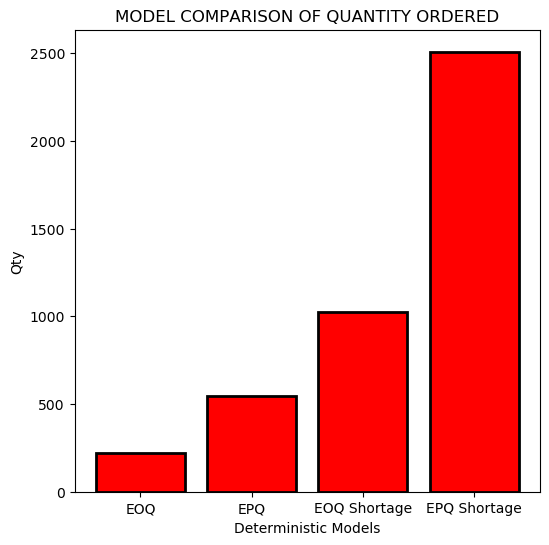

In [91]:
import matplotlib.pyplot as plt

l = [Q, Q2, Q3, Q4]
names = ["EOQ", "EPQ", "EOQ Shortage", "EPQ Shortage"]

plt.figure(figsize=(6,6))
plt.bar(names, l, color = 'r',edgecolor='k',linewidth=2)
plt.ylabel("Qty")
plt.xlabel("Deterministic Models")
plt.title("MODEL COMPARISON OF QUANTITY ORDERED")
plt.show()

3. WAP to implement inheritence. Create a class Employee and inherit two classes namely Manager and Clerk from employee.